# Imports

In [29]:
import ctypes
import matplotlib.pyplot as plt
import numpy as np


In [30]:
#my_dll_path = "../mllib_rust.dll"
my_dll_path = "D:\Dev\Instrument-Classification\Project\Lib\SupervisingML/target\debug\mllib_rust.dll"
my_lib2 = ctypes.CDLL(my_dll_path)


In [31]:
# Definition des FONCTIONS

In [32]:
my_lib2.init_linear_model.argtypes = [ctypes.c_int]
my_lib2.init_linear_model.restype = ctypes.c_void_p
my_lib2.train_linear_model_classification.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_int,
    ctypes.c_double
]
my_lib2.train_linear_model_classification.restype = None
my_lib2.predict_linear_model_classification.argtypes = [
    ctypes.c_void_p,
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int
]
my_lib2.predict_linear_model_classification.restype = ctypes.c_double
model = my_lib2.init_linear_model(ctypes.c_int(2))


# Cas de tests, rendu 3

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [33]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

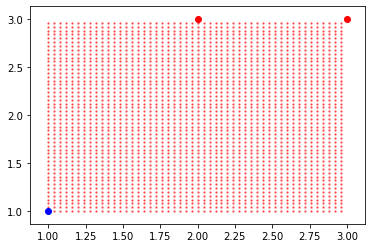

<Figure size 432x288 with 0 Axes>

In [34]:
model = my_lib2.init_linear_model(ctypes.c_int(2))
flattened_X = X.flatten()
my_lib2.train_linear_model_classification(
    model,
    flattened_X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
    X.shape[0],
    X.shape[1],
    1000,
    0.01
)
test_points = np.array([[i, j] for i in range(50) for j in range(50)], dtype='float64') / 50.0 * 2.0 + 1.0
test_points_predicted = np.zeros(len(test_points))
red_points = []
blue_points = []
for k, test_input_k in enumerate(test_points):
    predicted_value = my_lib2.predict_linear_model_classification(
        model,
        test_input_k.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
        len(test_input_k))
    if predicted_value == 1.0:
        blue_points.append(test_input_k)
    else:
        red_points.append(test_input_k)
red_points = np.array(red_points)
blue_points = np.array(blue_points)
if len(red_points) > 0:
    plt.scatter(red_points[:, 0], red_points[:, 1], color='red', alpha=0.5, s=2)
if len(blue_points) > 0:
    plt.scatter(blue_points[:, 0], blue_points[:, 1], color='blue', alpha=0.5, s=2)
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [35]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 2)), np.ones((50, 2)) * -1.0])

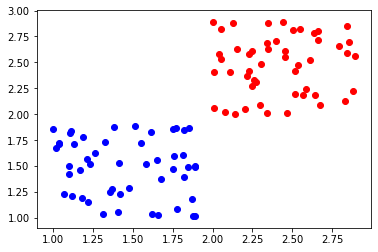

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [37]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

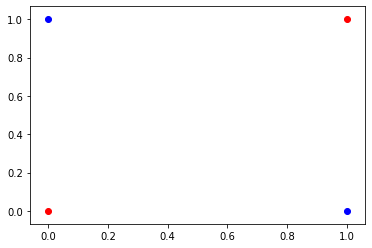

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [39]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

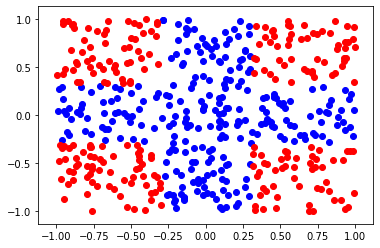

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [41]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

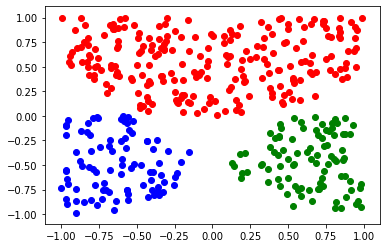

<Figure size 432x288 with 0 Axes>

In [42]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [43]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

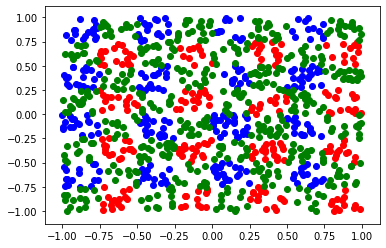

<Figure size 432x288 with 0 Axes>

In [44]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [45]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

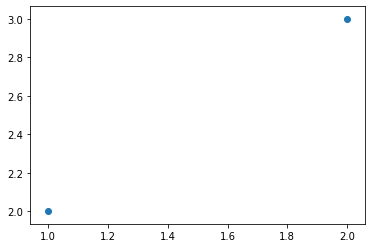

<Figure size 432x288 with 0 Axes>

In [46]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [47]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

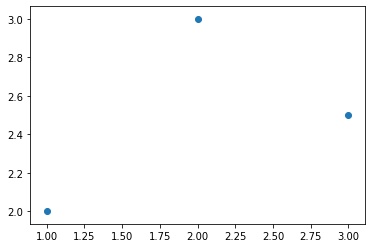

<Figure size 432x288 with 0 Axes>

In [48]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [49]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

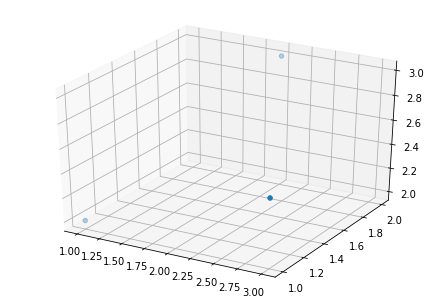

<Figure size 432x288 with 0 Axes>

In [50]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [51]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

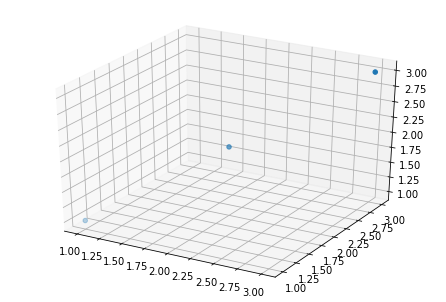

<Figure size 432x288 with 0 Axes>

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [53]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

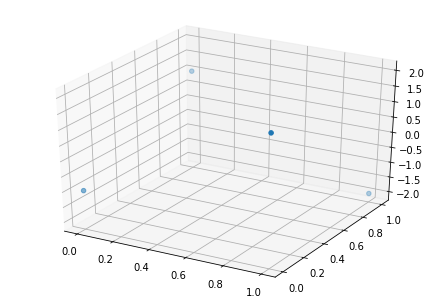

<Figure size 432x288 with 0 Axes>

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()